# Dog Breed Identification

- We'll be using data from the Kaggle dog breed identification competition. It consists of a collection of 10,000+ labelled images of 120 different dog breeds. (https://www.kaggle.com/c/dog-breed-identification/overview)

- For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub.

- The process of using a pretrained model and adapting it to your own problem is called transfer learning. We do this because rather than train our own model from scratch (could be timely and expensive), we leverage the patterns of another model which has been trained to classify images.

In [70]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.7.0
Hub version: 0.12.0
GPU available


# Getting data ready

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into `Tensors` (numerical representations).

In [71]:
# Tthis cell will provide you with a token to link your drive to this notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Accessing the data

Let's start with `labels.csv` which contains all of the image ID's and their assosciated dog breed (our data and labels).

In [72]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Projects/Data/dog-breed-identification/labels.csv")

print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     1be0f5da239e9c76a8b3693b2ff8c67f  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [73]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


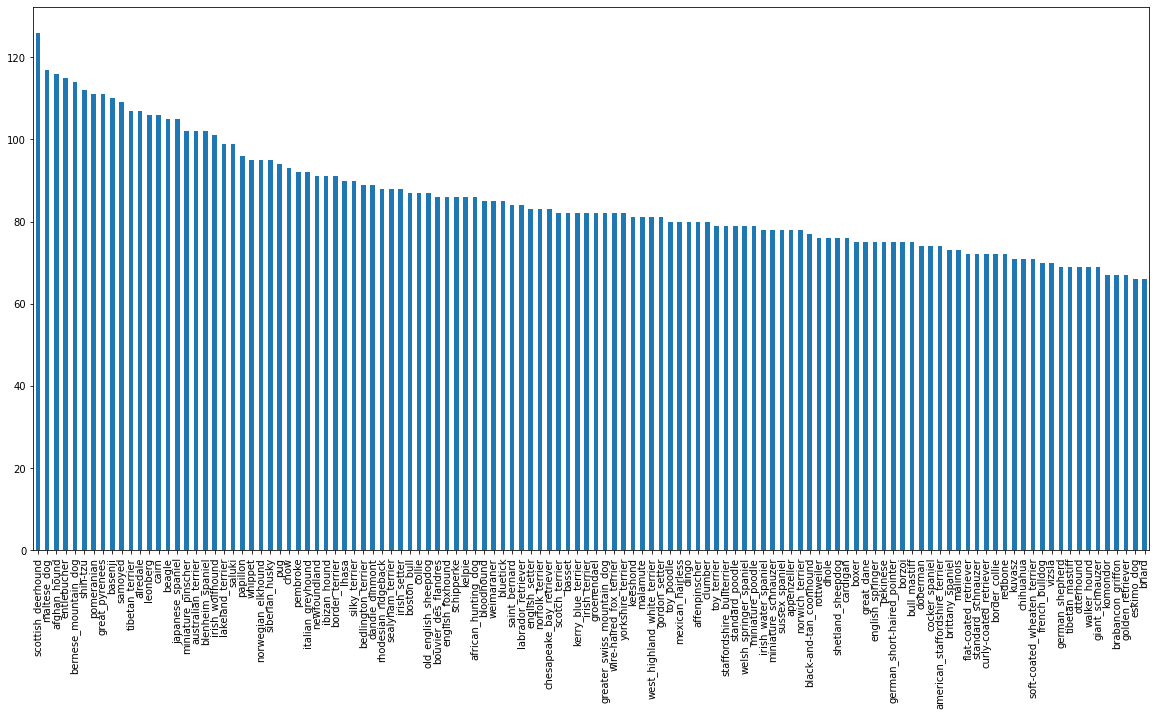

In [74]:
# How many images are there of each breed?

labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [75]:
# What's the median number of images per class?
labels_csv["breed"].value_counts().median()

82.0

## Getting images and their labels

In [76]:
from IPython.display import display, Image

In [77]:
# Create pathnames from image ID's
filenames = ["/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My

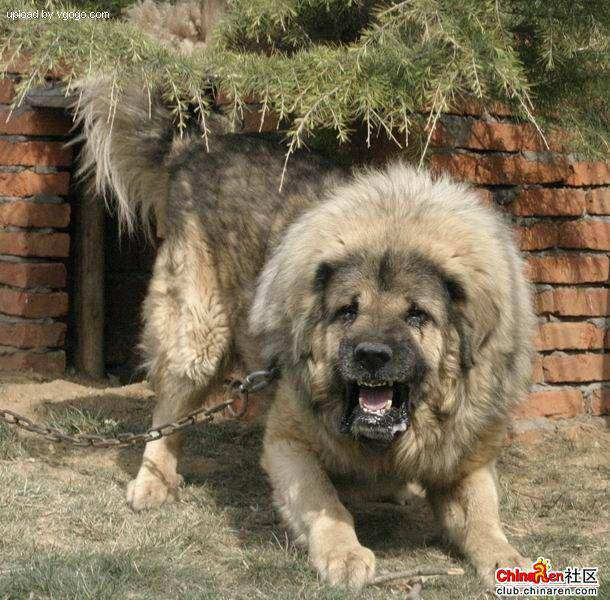

In [78]:
Image(filenames[9000])

In [79]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [80]:
len(filenames)

10222

In [81]:
# Data check
# Check whether number of filenames matches number of actual image files
import os

if len(os.listdir("/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/")) == len(filenames):
  print("Filenames match actual amount of files! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files! Proceed.


In [82]:
import numpy as np

labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array (array of strings)
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [83]:
len(labels)

10222

In [84]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [85]:
# Find the unique label values
unique_breeds = np.unique(labels)

len(unique_breeds)

120

In [86]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [87]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [88]:
# Example: Turning boolean array into integers

print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [89]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's `train_test_split` function or we could simply make manual splits of the data.

For accessibility later, let's save our filenames variable to `X` (data) and our labels to `y`.

In [90]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

In [91]:
len(filenames)

10222

In [92]:
len(boolean_labels)

10222

In [93]:
# Setup X & y variables
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed.

In [94]:
# Set number of images to use for experimenting

NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

Now let's split our data into training and validation sets. We'll use and 80/20 split (80% training data, 20% validation data).

In [95]:
# Split them into training and validation using NUM_IMAGES 

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [96]:
# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Projects/Data/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, F

## Preprocessing images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:

* Takes an image filename as input.
* Uses TensorFlow to read the file and save it to a variable, image.
* Turn our image (a jpeg file) into Tensors.
* Resize the image to be of shape (224, 224).
* Return the modified image.

Why (224, 224), which is (heigh, width). It's because this is the size of input our model takes, an image which is (224, 224, 3).

3 - that's the number of colour channels per pixel, red, green and blue.

In [97]:
# Convert image to NumPy array

from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

It's (257, 350, 3). This is height, width, colour channel value

Convert it to a Tensor using tf.constant()

In [98]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  
  return image

## Creating data batches

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: `(image, label)`.

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In [99]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [100]:
# Create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

In [101]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

In [102]:
# Create a function to turn data into batches

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [103]:
# Create training and validation data batches

train_data = create_data_batches(X_train, y_train)

val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [104]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [105]:
# Check out the different attributes of our data batches

# TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None) - images
# TensorSpec(shape=(None, 120), dtype=tf.bool, name=None) - labels

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [106]:
y[0] # 120 dog breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## Visualizing data batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them.

In [107]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [108]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the `as_numpy_iterator()` method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to `next()` will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

In [109]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

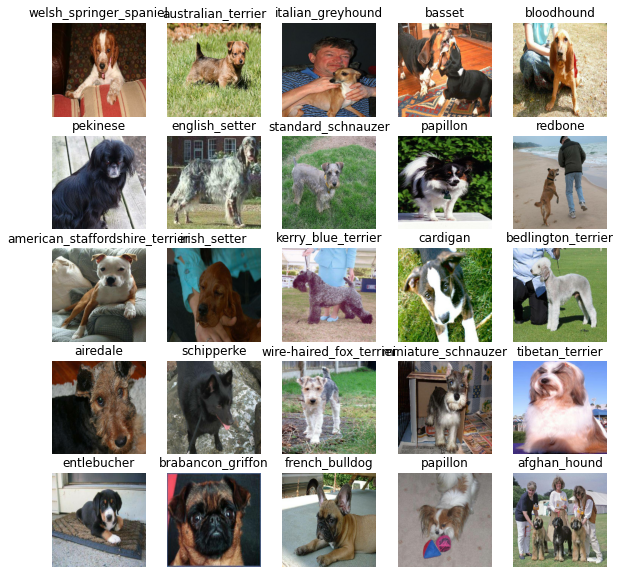

In [110]:
# Visualize training images from the training data batch

train_images, train_labels = next(train_data.as_numpy_iterator())

show_25_images(train_images, train_labels)

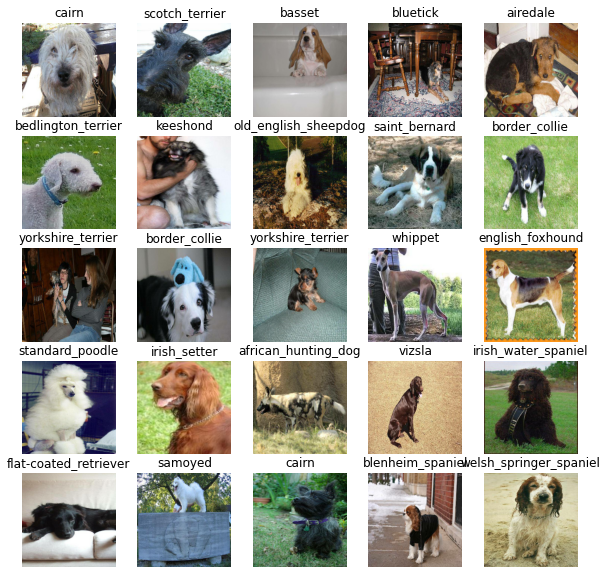

In [111]:
# Visualize validation images from the validation data batch

val_images, val_labels = next(val_data.as_numpy_iterator())

show_25_images(val_images, val_labels)

# Creating and training a model

Now our data is ready, let's prepare it modelling. We'll use an existing model from TensorFlow Hub.

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as **transfer learning**.

## Building a model

Before we build a model, there are a few things we need to define:

* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.

In [112]:
IMG_SIZE

224

In [113]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Let's create a function which:

* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

In [114]:
# Create a function which builds a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):

  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

### Model layers

The first layer we use is the model from TensorFlow Hub (`hub.KerasLayer(MODEL_URL`). So our first layer is actually an entire model (many more layers). This **input layer** takes in our images and finds patterns in them based on the patterns `mobilenet_v2_130_224` has found.

The next layer (`tf.keras.layers.Dense()`) is the **output layer** of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, 120 (the number of unique labels we have).

The `activation="softmax"` parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels somewhere between 0 & 1. The higher the value, the more the model believes the input image should have that label. If we were working on a binary classification problem, we'd use `activation="sigmoid"`.

### Compiling the model

`model.compile()` terminology:

* `loss` - The height of the hill is the loss function, the models goal is to minimize this, getting to 0 (the bottom of the hill) means the model is learning perfectly.
* `optimizer` - "Your friend Adam" is the optimizer, he's the one telling you how to navigate the hill (lower the loss function) based on what you've done so far. His name is Adam because the Adam optimizer is a great general which performs well on most models. Other optimizers include RMSprop and Stochastic Gradient Descent.
* `metrics` - This is the onlooker at the bottom of the hill rating how well your perfomance is. Or in our case, giving the accuracy of how well our model is predicting the correct image label.

In [115]:
# Create a model and check its details

model = create_model()

model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

#### TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension 
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function. 
3. Visualize our models training logs with the %tensorboard magic function.

In [116]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [117]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Projects/Data/dog-breed-identification/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping Callback

Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [118]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

## Train a model

Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

`NUM_EPOCHS` defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.

If `NUM_EPOCHS=1`, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself. (It would be like you competing in the international hill descent championships and your friend Adam only being able to give you 1 single instruction to get down the hill.)

In [119]:
# How many rounds should we get the model to look through the data?

NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

* Create a model using `create_model()`.
* Setup a TensorBoard callback using `create_tensorboard_callback()` (we do this here so it creates a log directory of the current date and time).
* Call the `fit()` function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [120]:
# Build a function to train and return a trained model

def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [121]:
# Fit the model to the data

model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 119s 4s/step - loss: 4.5439 - accuracy: 0.0925 - val_loss: 3.3968 - val_accuracy: 0.2200
Epoch 2/100
25/25 [==============================] - 5s 194ms/step - loss: 1.6004 - accuracy: 0.6925 - val_loss: 2.2053 - val_accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 5s 179ms/step - loss: 0.5436 - accuracy: 0.9388 - val_loss: 1.7385 - val_accuracy: 0.5300
Epoch 4/100
25/25 [==============================] - 5s 179ms/step - loss: 0.2414 - accuracy: 0.9912 - val_loss: 1.5521 - val_accuracy: 0.5650
Epoch 5/100
25/25 [==============================] - 5s 180ms/step - loss: 0.1451 - accuracy: 0.9987 - val_loss: 1.4844 - val_accuracy: 0.5900
Epoch 6/100
25/25 [==============================] - 5s 182ms/step - loss: 0.0976 - accuracy: 1.0000 - val_loss: 1.4357 - val_accuracy: 0.5950
Epoch 7/100
25/25 [==============================]

In [122]:
# %tensorboard --logdir content/drive/MyDrive/Projects/Data/dog-breed-identification/logs

In [123]:
# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

In [124]:
# Control TensorBoard display.
# notebook.display(port=6007, height=1000) 

### Making and evaluating predictions using a trained model

In [125]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [126]:
# Make predictions on the validation data (not used to train on)

predictions = model.predict(val_data, verbose=1)

predictions

7/7 [==============================] - 2s 151ms/step


array([[4.16098349e-03, 9.09122718e-06, 2.19702633e-04, ...,
        1.66728933e-04, 9.10627296e-06, 5.59222698e-03],
       [1.97704742e-03, 1.24316034e-03, 1.44545063e-02, ...,
        1.18698843e-03, 9.76154406e-04, 3.81732243e-05],
       [4.80904782e-06, 3.48804097e-05, 6.56477550e-06, ...,
        7.32953094e-06, 2.39314049e-05, 9.97197931e-05],
       ...,
       [7.82942095e-07, 5.14293970e-06, 2.08202164e-06, ...,
        3.78749655e-06, 1.83896700e-05, 4.34479080e-05],
       [8.55206791e-03, 9.96899325e-05, 2.94938436e-05, ...,
        8.83410175e-05, 9.24267370e-05, 1.44187566e-02],
       [1.34592061e-03, 9.67963570e-05, 1.07842272e-04, ...,
        1.11580361e-02, 2.29533383e-04, 1.15755814e-04]], dtype=float32)

In [127]:
# Check the shape of predictions

predictions.shape

(200, 120)

In [128]:
len(y_val)

200

In [129]:
len(unique_breeds)

120

Making predictions with our model returns an array with a different value for each label.

In this case, making predictions on the validation data (200 images) returns an array (`predictions`) of arrays, each containing 120 different values (one for each unique dog breed).

In [132]:
# First prediction

print(predictions[0])
print("\n")
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[4.1609835e-03 9.0912272e-06 2.1970263e-04 1.6950698e-05 7.1611634e-05
 1.7198565e-05 3.0342482e-02 1.4434528e-04 6.5841370e-05 1.9803669e-04
 9.0876594e-05 1.6450627e-05 2.8596394e-04 2.5515610e-05 3.9282511e-04
 2.7025910e-04 9.7196171e-06 8.3124168e-02 3.1687482e-06 3.6039408e-05
 5.9412501e-04 2.6908046e-05 3.4571096e-06 7.0945470e-04 2.1991678e-05
 3.2709213e-04 1.1286439e-01 1.5426886e-05 4.1982942e-04 1.1128542e-04
 1.8967306e-05 4.9741665e-04 1.3222593e-04 6.2275644e-06 1.0730514e-04
 3.3590652e-02 1.3202300e-05 2.9660916e-04 3.8905579e-05 7.9328936e-05
 3.4093406e-04 1.9593819e-05 3.5851004e-05 9.8899567e-05 3.6762015e-06
 6.8076544e-05 1.7488062e-06 1.7449155e-04 1.4435504e-04 4.3922719e-05
 9.6998519e-05 2.0813241e-05 7.9983685e-05 5.0808587e-05 2.1897460e-05
 9.9000963e-06 4.1343312e-05 1.1971866e-03 7.2879542e-04 4.3657082e-01
 2.1531949e-04 3.5584815e-06 9.8686037e-04 2.2440099e-05 2.8926472e-04
 3.5114136e-02 3.8949947e-05 6.7607602e-05 6.1265007e-03 4.5971126e-05
 3.421

In [133]:
unique_breeds[59]

'irish_wolfhound'

In [134]:
# Turn prediction probabilities into their respective label (easier to understand)

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

In [135]:
# Get a predicted label based on an array of prediction probabilities

pred_label = get_pred_label(predictions[0])
pred_label

'irish_wolfhound'

Since our validation data (`val_data`) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using `unbatch()`) and then turn it into an iterator using `as_numpy_iterator()`.

In [136]:
# Create a function to unbatch a batched dataset

def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

In [137]:
# Unbatchify the validation data

val_images, val_labels = unbatchify(val_data)

val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

We want to be able to view an image, its predicted label and its actual label (true label).

* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [138]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

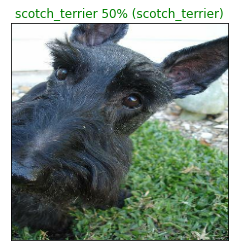

In [139]:
# View an example prediction, original image and truth label

plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

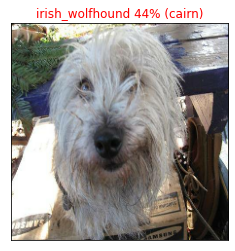

In [144]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=0)

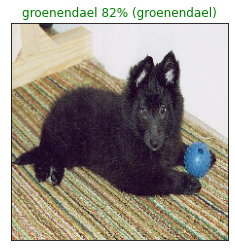

In [145]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

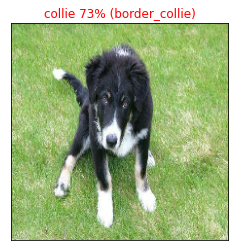

In [148]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=9)

In [154]:
predictions[0].argsort()[-10:][::-1] # -10: -> top 10 values (indexes) ::-1 -> reverse this

array([ 59,  26,  17, 103,  73,  65,  70,  35,   6, 102])

In [155]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.43657082, 0.11286439, 0.08312417, 0.0562663 , 0.04976888,
       0.03511414, 0.03421314, 0.03359065, 0.03034248, 0.0263573 ],
      dtype=float32)

In [157]:
predictions[0].max()

0.43657082

In [146]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1] 
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

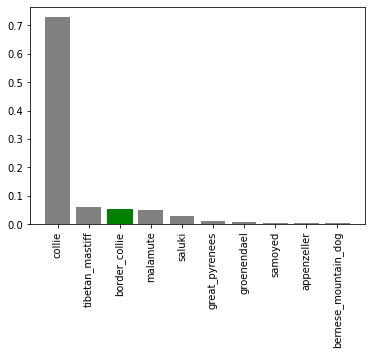

In [147]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

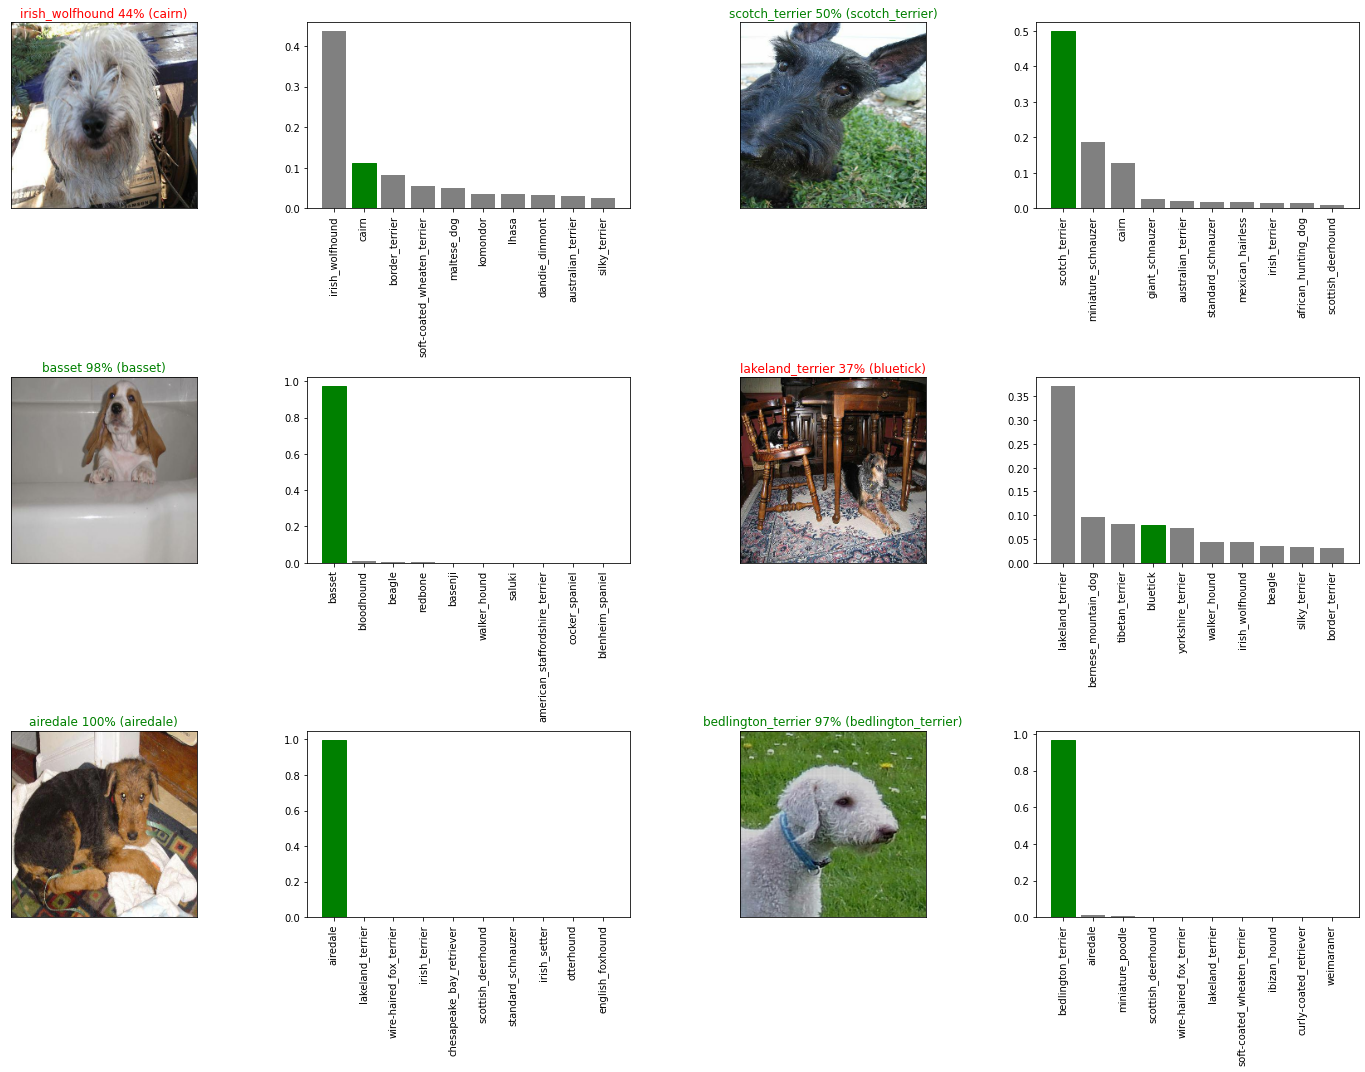

In [159]:
# Let's check a few predictions and their different values

i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
  
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model

In [163]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("/content/drive/MyDrive/Projects/Data/dog-breed-identification/models",
                          datetime.datetime.now().strftime("%Y%m%d"))
  
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)

  return model_path

Because we're using a component from **TensorFlow Hub** (`hub.KerasLayer`) we'll have to pass this as a parameter to the `custom_objects` parameter.

In [161]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")

  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  
  return model

In [164]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: /content/drive/MyDrive/Projects/Data/dog-breed-identification/models/20220201-1000-images-Adam.h5...


'/content/drive/MyDrive/Projects/Data/dog-breed-identification/models/20220201-1000-images-Adam.h5'

In [165]:
# Load our model trained on 1000 images
model_1000_images = load_model('/content/drive/MyDrive/Projects/Data/dog-breed-identification/models/20220201-1000-images-Adam.h5')

Loading saved model from: /content/drive/MyDrive/Projects/Data/dog-breed-identification/models/20220201-1000-images-Adam.h5


In [166]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 171ms/step - loss: 1.2658 - accuracy: 0.6500


[1.2657760381698608, 0.6499999761581421]

In [167]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 3s 164ms/step - loss: 1.2658 - accuracy: 0.6500


[1.2657760381698608, 0.6499999761581421]

## Training a model (on the full data)

In [168]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

(10222, 10222)

In [169]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [170]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [171]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [172]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 58s 163ms/step - loss: 1.3426 - accuracy: 0.6706
Epoch 2/100
320/320 [==============================] - 50s 157ms/step - loss: 0.4009 - accuracy: 0.8823
Epoch 3/100
320/320 [==============================] - 51s 160ms/step - loss: 0.2361 - accuracy: 0.9341
Epoch 4/100
320/320 [==============================] - 48s 149ms/step - loss: 0.1520 - accuracy: 0.9647
Epoch 5/100
320/320 [==============================] - 48s 150ms/step - loss: 0.1050 - accuracy: 0.9791
Epoch 6/100
320/320 [==============================] - 50s 155ms/step - loss: 0.0777 - accuracy: 0.9877
Epoch 7/100
320/320 [==============================] - 49s 154ms/step - loss: 0.0587 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 49s 153ms/step - loss: 0.0463 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 50s 157ms/step - loss: 0.0374 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] - 50s 156m

In [173]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: /content/drive/MyDrive/Projects/Data/dog-breed-identification/models/20220201-all-images-Adam.h5...


'/content/drive/MyDrive/Projects/Data/dog-breed-identification/models/20220201-all-images-Adam.h5'

In [174]:
# Load in the full model
loaded_full_model = load_model('/content/drive/MyDrive/Projects/Data/dog-breed-identification/models/20220201-all-images-Adam.h5')

Loading saved model from: /content/drive/MyDrive/Projects/Data/dog-breed-identification/models/20220201-all-images-Adam.h5


# Making predictions on the test dataset

To make predictions on the test data, we'll:

* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the `predict()` function.

In [175]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)

test_path = "/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/e7ce78e874945f182a4f5149aa505b09.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/e7e9624f2a2e61ab187358f5968bfde8.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/e7e9dd51302fe08c1c89a550e183cf07.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/e7ed96b272013c6de9505a753816ce75.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/e7f95aabf775a636b3893ffa120adaf9.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/e7fcdf9671a6593b638cbee42842f981.jpg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/e7feb64da6aae1ef8e62453f6660d0c5.jpg',
 '/content/drive/MyDrive/Pro

In [176]:
len(test_filenames)

10357

In [177]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [178]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 1129s 3s/step


In [179]:
# Check out the test predictions
test_predictions[:10]

array([[1.2794035e-06, 3.3141761e-05, 1.5832628e-06, ..., 6.9829516e-06,
        3.7978523e-09, 1.0017886e-06],
       [7.6424260e-07, 3.0734276e-10, 5.6119181e-05, ..., 4.0727430e-09,
        1.7070757e-08, 2.0847365e-06],
       [3.5578880e-06, 2.6756336e-08, 2.3548294e-08, ..., 5.2942695e-10,
        6.9053232e-07, 1.5165234e-07],
       ...,
       [1.5792940e-15, 6.3221542e-13, 1.6937057e-14, ..., 2.0410264e-12,
        6.0298548e-14, 1.1184868e-15],
       [5.2818734e-07, 2.2974667e-05, 9.4651416e-09, ..., 1.7218547e-08,
        2.2957934e-07, 1.7868588e-04],
       [2.1936150e-10, 1.6627829e-11, 3.2173635e-09, ..., 7.9042756e-04,
        3.7797503e-07, 5.9875348e-11]], dtype=float32)

In [180]:
test_predictions.shape

(10357, 120)

In [181]:
# Create pandas DataFrame with empty columns

preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [182]:
# Append test image ID's to predictions DataFrame

test_path = "/content/drive/MyDrive/Projects/Data/dog-breed-identification/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7be7b911a4cba9fdfa4105ec4776370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7ce78e874945f182a4f5149aa505b09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e7dc8cc599049ea9fa2a172c88646c57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e7e9624f2a2e61ab187358f5968bfde8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e7e9dd51302fe08c1c89a550e183cf07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
# Add the prediction probabilities to each dog breed column

preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7be7b911a4cba9fdfa4105ec4776370,1.2794e-06,3.31418e-05,1.58326e-06,1.59188e-07,1.27166e-09,7.45046e-08,5.55657e-10,1.67911e-08,7.45057e-09,1.01561e-11,7.69495e-09,3.78359e-07,3.88458e-09,8.45108e-07,7.28304e-08,5.41582e-10,3.38722e-09,9.89636e-09,4.69566e-09,2.78538e-09,0.000371237,8.34331e-11,1.67236e-08,0.000888085,1.22855e-09,7.64912e-09,1.16922e-06,2.80396e-06,5.5253e-08,2.25527e-09,1.65779e-09,3.0068e-11,5.84898e-07,3.86489e-09,2.06117e-09,2.07837e-08,1.57033e-09,1.81886e-07,6.96732e-09,...,1.49191e-06,1.31146e-08,6.01127e-09,3.01652e-09,2.42851e-07,1.85111e-08,1.31301e-10,4.56283e-08,2.80451e-06,4.80313e-09,7.87292e-08,5.25034e-08,7.31425e-10,2.45215e-09,4.43007e-10,7.17634e-06,0.637466,5.346e-07,5.39434e-09,1.16746e-09,1.65517e-09,3.95063e-09,9.80492e-08,3.59997e-06,1.32678e-05,1.78107e-09,0.00373826,1.24477e-07,1.84801e-08,5.94279e-06,2.83619e-08,2.53858e-11,1.06712e-10,1.02304e-08,1.27808e-10,1.37587e-10,8.50152e-09,6.98295e-06,3.79785e-09,1.00179e-06
1,e7ce78e874945f182a4f5149aa505b09,7.64243e-07,3.07343e-10,5.61192e-05,2.90273e-13,6.96717e-09,8.64278e-07,9.11064e-09,3.71029e-08,3.5046e-10,1.81977e-11,5.68883e-10,1.66952e-08,1.59216e-08,7.25855e-11,3.70948e-08,2.42882e-09,7.80676e-07,1.81049e-09,6.71116e-10,5.43187e-06,5.24298e-08,1.85554e-11,5.67109e-07,6.46805e-08,5.03618e-08,4.46979e-11,3.28653e-09,1.10049e-06,3.21099e-08,3.25529e-05,4.61604e-08,2.40119e-07,3.29184e-09,2.40816e-07,7.54821e-06,1.13607e-08,3.0714e-06,2.07081e-06,2.75783e-08,...,3.07485e-05,1.23869e-06,2.95067e-11,2.65196e-10,4.57045e-06,1.406e-10,1.73703e-07,3.24356e-06,4.67874e-08,7.48386e-08,2.56465e-11,2.64389e-09,1.09353e-10,2.49963e-10,2.64684e-08,0.654024,7.66697e-06,2.13614e-07,1.28557e-08,1.23888e-08,2.62161e-08,6.48908e-07,1.56684e-10,7.46247e-08,9.85493e-06,6.2818e-07,2.18641e-09,4.52534e-07,2.10117e-06,5.1322e-08,3.48446e-07,1.36114e-07,2.09839e-08,3.49534e-11,2.29894e-08,3.52634e-10,2.78453e-08,4.07274e-09,1.70708e-08,2.08474e-06
2,e7dc8cc599049ea9fa2a172c88646c57,3.55789e-06,2.67563e-08,2.35483e-08,1.85008e-10,9.24289e-07,4.55082e-08,9.31852e-09,1.45368e-08,1.16632e-10,1.26302e-09,4.45724e-10,1.06933e-06,7.92833e-08,2.3701e-08,1.54228e-09,4.02255e-08,0.354449,1.80711e-09,6.24557e-09,8.54199e-07,2.14354e-09,6.80845e-09,4.76988e-09,4.18876e-08,2.24716e-07,1.25067e-08,1.5935e-08,1.13951e-07,2.31251e-10,8.33219e-06,2.21981e-08,3.1415e-08,2.86221e-06,0.000178682,4.34434e-08,1.94273e-10,3.68993e-07,3.87813e-10,4.15048e-09,...,6.68687e-09,4.81538e-07,4.39454e-08,3.70289e-08,0.644839,1.02675e-05,5.81354e-08,9.26361e-06,8.18005e-08,2.13501e-09,3.06076e-10,1.87468e-08,1.26099e-07,1.05808e-07,2.37819e-07,0.000128919,1.98675e-08,4.13536e-10,3.62375e-09,4.24168e-06,1.25142e-05,8.17389e-06,8.15454e-07,1.50214e-10,1.61076e-06,5.49646e-07,2.43573e-09,6.0267e-09,1.3716e-08,5.13354e-07,7.12126e-07,5.16719e-08,1.17061e-08,3.02856e-08,1.263e-08,6.12706e-09,7.78774e-

In [184]:
preds_df.to_csv("/content/drive/MyDrive/Projects/Data/dog-breed-identification/full_submission_1_mobilienetV2_adam.csv", index=False)

# Making predictions on custom images

* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [187]:
# Get custom image filepaths

custom_path = "/content/drive/MyDrive/Projects/Data/dog-breed-identification/custom_images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

custom_image_paths

['/content/drive/MyDrive/Projects/Data/dog-breed-identification/custom_images/dog-photo-3.jpeg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/custom_images/dog-photo-1.jpeg',
 '/content/drive/MyDrive/Projects/Data/dog-breed-identification/custom_images/dog-photo-2.jpeg']

In [188]:
# Turn custom image into batch (set to test data because there are no labels)

custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [189]:
# Make predictions on the custom data

custom_preds = loaded_full_model.predict(custom_data)

In [193]:
custom_preds.shape

(3, 120)

In [190]:
# Get custom image prediction labels

custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['labrador_retriever', 'golden_retriever', 'lakeland_terrier']

In [191]:
# Get custom images (our unbatchify() function won't work since there aren't labels)

custom_images = []

# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

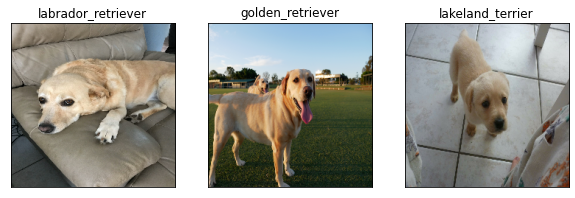

In [192]:
# Check custom image predictions

plt.figure(figsize=(10, 10))

for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)